In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [7]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df.describe(include = 'all')

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### **Task 4**: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

### 1. For the "Median value of owner-occupied homes" provide a boxplot

[Text(0.5, 0, "Median value of owner-occupied homes in $1000's"),
 Text(0, 0.5, 'Box-Plot'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes - Box Plot')]

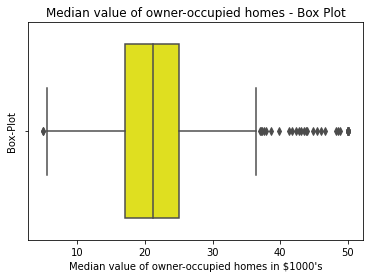

In [10]:
bxplot = sns.boxplot(x='MEDV',color = 'Yellow', data=boston_df)
bxplot.set( xlabel = 'Median value of owner-occupied homes in $1000\'s',
            ylabel = 'Box-Plot',
            title = 'Median value of owner-occupied homes - Box Plot')

***Inference:*** The box-plot shows that the Median value lies approximately around 21.   

### 2. Provide a  bar plot for the Charles river variable

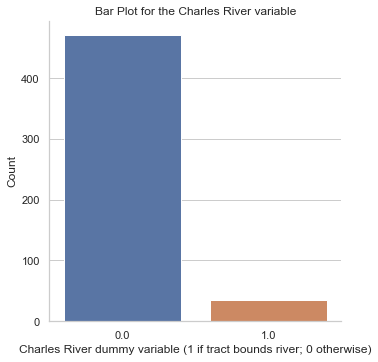

In [11]:
sns.set(style="whitegrid")
brplot = sns.catplot(x='CHAS', kind = 'count', data = boston_df)
brplot.set( ylabel = 'Count',
            xlabel = 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
            title = 'Bar Plot for the Charles River variable')


***Inference:*** The bar-plot shows that the house count near the bank of Charles river is significantly less than the house count away from the bank. 

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'MEDV variable vs the AGE variable')]

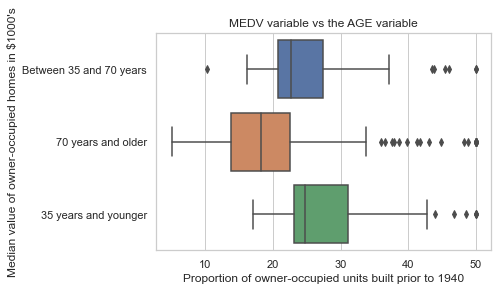

In [12]:
boston_df.loc[(boston_df['AGE']<=35), 'Age_group']= '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'Age_group']= 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'Age_group']= '70 years and older'

bxplot2 = sns.boxplot(x = 'MEDV', y = 'Age_group', data = boston_df)
bxplot2.set( xlabel = 'Proportion of owner-occupied units built prior to 1940',
             ylabel = "Median value of owner-occupied homes in $1000's",
             title = 'MEDV variable vs the AGE variable')

***Inference:*** The box-plot shows that the Median for
 -  *"35 years and younger"* group is approx 25 
 -  *"70 years and older"* group is approx 19 
 -  *"Between 35 and 70 years"* group the Median is around 22. 

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


[Text(0, 0.5, 'Nitric Oxides concentration (parts per 10 million)'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

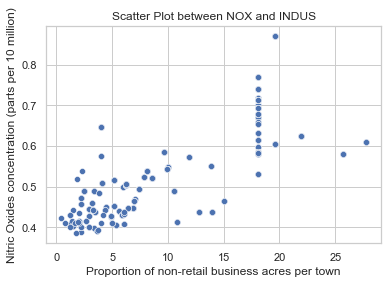

In [13]:

scatplot = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatplot.set( ylabel = "Nitric Oxides concentration (parts per 10 million)",
              xlabel = "Proportion of non-retail business acres per town",
              title = "Scatter Plot between NOX and INDUS")

***Inference:*** The Scatter-plot shows that there is a positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.

### 5. Create a histogram for the pupil to teacher ratio variable

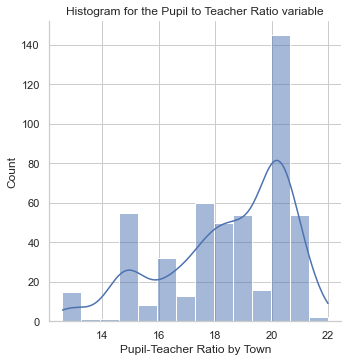

In [14]:
histplot = sns.displot(boston_df['PTRATIO'], kde = True)
histplot.set( xlabel = "Pupil-Teacher Ratio by Town",
              ylabel = "Count",
              title = "Histogram for the Pupil to Teacher Ratio variable")

***Inference:*** The highest count corresponds to the 20 - 22 range group. As the values are distributed towards the left, it is a Negative-skewed Distribution.

### **Task 5**: Use the appropriate tests to answer the questions provided.

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

### Qn 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


#### Hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")


In [15]:
#Levene's Test- Check test significance

scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')


LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [16]:
#T-Test

scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

***Conclusion:*** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

### Qn 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


In [17]:
boston_df.loc[(boston_df.AGE > 81), 'Age_group'] = 'Before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'Age_group'] = 'After 1940'

#### Hypothesis:

*   $H\_0:$ There is no difference in median values of houses for occupied units built prior to 1940.
*   $H\_1:$ There is a difference in median values of houses for occupied units built prior to 1940.

In [18]:
scipy.stats.levene(boston_df[boston_df['Age_group'] =='Before 1940']['MEDV'],
                  boston_df[boston_df['Age_group']=='After 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

In [19]:
Before_1940 = boston_df[boston_df['Age_group'] =='Before 1940']['MEDV']
After_1940 = boston_df[boston_df['Age_group']=='After 1940']['MEDV']

In [20]:
#One-way ANOVA

f_statistic, p_value = scipy.stats.f_oneway(Before_1940,After_1940)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 68.19097395438456, P-Value: 1.313562936560301e-15


***Conclusion:*** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence for the statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


### Qn 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


#### Hypothesis:

*   $H\_0:$ Nitric Oxide concentration is not correlated to proportion of retail business acres per town
*   $H\_1:$ Nitric Oxide concentration is correlated to proportion of retail business acres per town

In [21]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

***Conclusion:*** Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Qn 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


#### Hypothesis:

*   $H\_0: β1$ = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [22]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        17:01:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Conclusion:*** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 
            The coefficient is positive 1.0916 which also signifies that the impact increases by 1.0916 when there is an additional weighted distance to the five Boston employment centres .
